In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

In [21]:
#Names of sheets in excel data file
sheets = ['ACCESS','STORES','RESTAURANTS','ASSISTANCE','INSECURITY','TAXES','LOCAL','HEALTH','SOCIOECONOMIC']

#Number of sheets as a range
num_sheets=range(len(sheets))

#Store each sheet as a dataframe in a dictionary
#The key is the name of the sheet in lower case. The value is the contents of the sheet stored as a dataframe
fea_dict={}
keys = [sheets[i].lower() for i in num_sheets]
for i in num_sheets:
    fea_dict[keys[i]]=pd.read_excel('data/FoodEnvironmentAtlas.xlsx',sheet_name=sheets[i],converters={'FIPS': str}) 

#conveert FIPS to string so that leading zero remains


In [22]:
#Join dataframes into one using an inner join. Join on the columns: FIPS, State, County
fea = fea_dict[keys[0]]
i=1 #initialize counter
while i<len(num_sheets):
    fea = pd.merge(fea, fea_dict[keys[i]], on=['FIPS','State','County'], how='inner')
    i+=1

In [23]:
#Make a copy of the single joined dataframe
fea_data=fea.copy()

In [24]:
# Select columns that are percentages because they are already normalized with respecct to county population. 
# This will also prevent redundant informaiton. Colunms that were from date after target variable year were
# not included, with the exception of poverty rates as there was no similar variable
columns=['FIPS',
'PCT_LACCESS_POP10',
'PCT_LACCESS_LOWI10',
'PCT_LACCESS_HHNV10',
'PCT_LACCESS_SNAP15',
'PCT_LACCESS_CHILD10',
'PCT_LACCESS_SENIORS10',
'GROCPTH11',
'SUPERCPTH11',
'CONVSPTH11',
'SPECSPTH11',
'SNAPSPTH12',
'WICSPTH11',
'FFRPTH11',
'FSRPTH11',
'PC_FFRSALES07',
'PC_FFRSALES12',
'PC_FSRSALES07',
'PC_FSRSALES12',
'REDEMP_SNAPS12',
'PCT_SNAP12',
'PC_SNAPBEN12',
'SNAP_PART_RATE11',
'PCT_NSLP12',
'PCT_FREE_LUNCH10',
'PCT_REDUCED_LUNCH10',
'PCT_SBP12',
'PCT_SFSP12',
'PC_WIC_REDEMP11',
'REDEMP_WICS11',
'PCT_WIC12',
'PCT_CACFP12',
'FOODINSEC_12_14',
'VLFOODSEC_12_14',
'PCT_LOCLFARM07',
'PCT_LOCLFARM12',
'PCT_LOCLSALE07',
'PCT_LOCLSALE12',
'PC_DIRSALES07',
'PC_DIRSALES12',
'PCH_PC_DIRSALES_07_12',
'FMRKTPTH13',
'VEG_ACRESPTH07',
'VEG_ACRESPTH12',
'PCH_VEG_ACRESPTH_07_12',
'FRESHVEG_ACRESPTH07',
'FRESHVEG_ACRESPTH12',
'PCH_FRESHVEG_ACRESPTH_07_12',
'ORCHARD_ACRESPTH07',
'ORCHARD_ACRESPTH12',
'PCH_ORCHARD_ACRESPTH_07_12',
'BERRY_ACRESPTH07',
'BERRY_ACRESPTH12',
'PCH_BERRY_ACRESPTH_07_12',
'GHVEG_SQFTPTH07',
'GHVEG_SQFTPTH12',
'PCH_GHVEG_SQFTPTH_07_12',
'RECFACPTH11',
'PCT_NHWHITE10',
'PCT_NHBLACK10',
'PCT_HISP10',
'PCT_NHASIAN10',
'PCT_NHNA10',
'PCT_NHPI10',
'PCT_65OLDER10',
'PCT_18YOUNGER10',
'MEDHHINC15',
'POVRATE15',
'PCT_DIABETES_ADULTS13', 'PCT_DIABETES_ADULTS08',
'CHILDPOVRATE15']

In [25]:
#subset dataframe
fea_data_sub=fea_data[columns] 

In [26]:
fea_data_sub.shape

(3143, 71)

In [27]:
# Choose numerical columns
fea_data_sub_numeric=fea_data_sub.select_dtypes([np.number])

In [28]:
 # Create correlation matrix
corrmatrix=fea_data_sub_numeric.corr()

In [29]:
corrmatrix

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,...,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PCT_DIABETES_ADULTS13,PCT_DIABETES_ADULTS08,CHILDPOVRATE15
PCT_LACCESS_POP10,1.000000,0.901991,0.120353,0.469834,0.960294,0.919663,0.336424,-0.114098,0.141654,-0.045043,...,-0.029079,0.157304,-0.010990,0.170400,0.024031,0.083173,-0.111678,-0.184580,-0.151607,-0.115664
PCT_LACCESS_LOWI10,0.901991,1.000000,0.278653,0.625093,0.890419,0.826792,0.312603,-0.099019,0.205566,-0.100324,...,-0.104286,0.263290,-0.018282,0.170309,0.071601,-0.175580,0.149489,-0.032667,-0.002725,0.142085
PCT_LACCESS_HHNV10,0.120353,0.278653,1.000000,0.469096,0.162711,0.043476,0.112428,-0.072707,0.083795,-0.123568,...,-0.119366,0.459477,-0.026078,-0.054357,0.083322,-0.348824,0.430246,0.268348,0.288093,0.431192
PCT_LACCESS_SNAP15,0.469834,0.625093,0.469096,1.000000,0.514461,0.350932,0.127557,-0.005639,0.100199,-0.107596,...,-0.085277,0.468196,-0.010444,-0.035277,0.183683,-0.287963,0.373430,0.136373,0.159692,0.368432
PCT_LACCESS_CHILD10,0.960294,0.890419,0.162711,0.514461,1.000000,0.823572,0.291381,-0.093925,0.107640,-0.056868,...,-0.018676,0.243110,-0.008160,0.046794,0.215924,0.110346,-0.099466,-0.196180,-0.157163,-0.111107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEDHHINC15,0.083173,-0.175580,-0.348824,-0.287963,0.110346,-0.008592,-0.050280,-0.049254,-0.294468,0.190558,...,0.431306,-0.083894,0.102030,-0.291583,0.145593,1.000000,-0.783640,-0.575257,-0.565172,-0.814689
POVRATE15,-0.111678,0.149489,0.430246,0.373430,-0.099466,-0.122713,-0.054436,0.025516,0.189015,-0.196037,...,-0.156139,0.201709,-0.045336,-0.074526,-0.008683,-0.783640,1.000000,0.530610,0.561606,0.938094
PCT_DIABETES_ADULTS13,-0.184580,-0.032667,0.268348,0.136373,-0.196180,-0.094231,-0.083842,0.025011,0.227950,-0.210047,...,-0.290610,0.016914,-0.043644,0.224886,-0.057354,-0.575257,0.530610,1.000000,0.857666,0.607158
PCT_DIABETES_ADULTS08,-0.151607,-0.002725,0.288093,0.159692,-0.157163,-0.081621,-0.058481,0.021160,0.258208,-0.206428,...,-0.254987,0.015642,-0.027187,0.174010,-0.033418,-0.565172,0.561606,0.857666,1.000000,0.625580


In [30]:
corrmatrix['PCT_DIABETES_ADULTS13']['PC_SNAPBEN12'] , corrmatrix['PCT_DIABETES_ADULTS13']['PCT_SNAP12']

(0.5441524917427926, 0.5352225777609942)

In [31]:
# Iterate through corrmatrix to get column pairs with correlation above threshold of 0.9
# Display these pairs


iters = range(len(corrmatrix.columns) - 1)
drop_cols = []

for i in iters:
        for j in range(i+1):
            item = corrmatrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= 0.85:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

PCT_LACCESS_LOWI10 | PCT_LACCESS_POP10 | 0.9
PCT_LACCESS_CHILD10 | PCT_LACCESS_POP10 | 0.96
PCT_LACCESS_CHILD10 | PCT_LACCESS_LOWI10 | 0.89
PCT_LACCESS_SENIORS10 | PCT_LACCESS_POP10 | 0.92
PC_FSRSALES12 | PC_FSRSALES07 | 0.91
VLFOODSEC_12_14 | FOODINSEC_12_14 | 0.86
VEG_ACRESPTH12 | VEG_ACRESPTH07 | 1.0
FRESHVEG_ACRESPTH12 | FRESHVEG_ACRESPTH07 | 0.95
ORCHARD_ACRESPTH12 | ORCHARD_ACRESPTH07 | 0.97
BERRY_ACRESPTH12 | BERRY_ACRESPTH07 | 0.98
PCT_DIABETES_ADULTS08 | PCT_DIABETES_ADULTS13 | 0.86
CHILDPOVRATE15 | POVRATE15 | 0.94


In [32]:
# List column to drop from each pair
drops=['PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PC_FSRSALES07','VEG_ACRESPTH07','FRESHVEG_ACRESPTH07','ORCHARD_ACRESPTH07','BERRY_ACRESPTH07','CHILDPOVRATE15','VLFOODSEC_12_14']

In [33]:
# Drop columns from dataframe
fea_data_sub_numeric=fea_data_sub_numeric.drop(columns=drops)

In [34]:
# Display dataframe with only selected columns 
fea_data_sub_numeric

,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,SNAPSPTH12,WICSPTH11,FFRPTH11,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PCT_DIABETES_ADULTS13,PCT_DIABETES_ADULTS08
0,33.769657,3.284786,4.608749,0.090581,0.018116,0.561604,0.018116,0.674004,0.090567,0.615953,...,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,13.0,11.4
1,19.318473,2.147827,1.298900,0.144746,0.032166,0.573622,0.107219,0.725055,0.139380,0.648675,...,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,10.4,9.8
2,20.840972,4.135869,4.303147,0.219370,0.000000,0.804358,0.109685,1.280590,0.255942,0.694673,...,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,18.4,13.6
3,4.559753,3.458580,0.676710,0.263794,0.043966,0.835348,0.000000,0.719122,0.263771,0.263794,...,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,14.8,11.1
4,2.700840,3.269380,0.812727,0.121608,0.017373,0.521177,0.017373,0.657144,0.139000,0.347451,...,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,14.1,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,30.570505,0.877134,2.141828,0.113603,0.022721,0.636176,0.022721,0.428936,0.090948,0.568014,...,15.269598,0.739625,0.723645,0.093594,8.316212,27.094462,71867.0,8.5,8.1,6.8
3139,29.174527,1.374848,0.670815,0.232818,0.000000,0.605327,0.279382,0.242215,0.140095,1.257217,...,14.985442,1.070724,0.356908,0.061050,9.852541,19.141542,83290.0,6.6,4.8,4.1
3140,20.220414,0.966219,2.072485,0.143548,0.047849,0.574190,0.095698,0.554895,0.143589,0.909134,...,8.783976,0.279383,0.582442,0.161000,8.873946,30.168577,62968.0,9.8,9.0,6.3
3141,10.915407,0.396304,1.053980,0.236407,0.000000,0.472813,0.000000,0.669502,0.236742,0.827423,...,13.617719,0.539084,0.597680,0.011719,17.672565,25.454119,56088.0,11.2,12.0,10.5


In [35]:
fea_data_sub_numeric['log_MEDHHINC15'] = np.log10(fea_data_sub_numeric.MEDHHINC15.values)

In [36]:
FEA_df = fea_data_sub_numeric.drop(columns='MEDHHINC15')

In [37]:
FEA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PCT_LACCESS_POP10            3143 non-null   float64
 1   PCT_LACCESS_HHNV10           3143 non-null   float64
 2   PCT_LACCESS_SNAP15           3123 non-null   float64
 3   GROCPTH11                    3143 non-null   float64
 4   SUPERCPTH11                  3143 non-null   float64
 5   CONVSPTH11                   3143 non-null   float64
 6   SPECSPTH11                   3143 non-null   float64
 7   SNAPSPTH12                   3143 non-null   float64
 8   WICSPTH11                    3008 non-null   float64
 9   FFRPTH11                     3143 non-null   float64
 10  FSRPTH11                     3143 non-null   float64
 11  PC_FFRSALES07                3143 non-null   float64
 12  PC_FFRSALES12                3143 non-null   float64
 13  PC_FSRSALES12     

In [38]:
#FEA_df.isnull()

### Cleaning the data by dropping off rows with Null values (NA/NAN/NAT).

In [39]:
FEA_df_clean = FEA_df.dropna()
FEA_df_clean.shape

(138, 60)

### Ooooops!!!! There is a big problem, we lost almost all the observations (rows) of the dataset

### Check for the total number of null entries in each column

In [40]:
for i in range(len(FEA_df.columns)):
    null_count = FEA_df[FEA_df.columns[i]].isnull().sum()
    null_total = {FEA_df.columns[i]: null_count}
    print(null_total)

{'PCT_LACCESS_POP10': 0}
{'PCT_LACCESS_HHNV10': 0}
{'PCT_LACCESS_SNAP15': 20}
{'GROCPTH11': 0}
{'SUPERCPTH11': 0}
{'CONVSPTH11': 0}
{'SPECSPTH11': 0}
{'SNAPSPTH12': 0}
{'WICSPTH11': 135}
{'FFRPTH11': 0}
{'FSRPTH11': 0}
{'PC_FFRSALES07': 0}
{'PC_FFRSALES12': 0}
{'PC_FSRSALES12': 0}
{'REDEMP_SNAPS12': 242}
{'PCT_SNAP12': 0}
{'PC_SNAPBEN12': 56}
{'SNAP_PART_RATE11': 0}
{'PCT_NSLP12': 0}
{'PCT_FREE_LUNCH10': 21}
{'PCT_REDUCED_LUNCH10': 31}
{'PCT_SBP12': 0}
{'PCT_SFSP12': 0}
{'PC_WIC_REDEMP11': 1109}
{'REDEMP_WICS11': 132}
{'PCT_WIC12': 0}
{'PCT_CACFP12': 0}
{'FOODINSEC_12_14': 0}
{'PCT_LOCLFARM07': 69}
{'PCT_LOCLFARM12': 68}
{'PCT_LOCLSALE07': 346}
{'PCT_LOCLSALE12': 287}
{'PC_DIRSALES07': 288}
{'PC_DIRSALES12': 243}
{'PCH_PC_DIRSALES_07_12': 459}
{'FMRKTPTH13': 3}
{'VEG_ACRESPTH12': 612}
{'PCH_VEG_ACRESPTH_07_12': 898}
{'FRESHVEG_ACRESPTH12': 1227}
{'PCH_FRESHVEG_ACRESPTH_07_12': 2091}
{'ORCHARD_ACRESPTH12': 597}
{'PCH_ORCHARD_ACRESPTH_07_12': 1122}
{'BERRY_ACRESPTH12': 810}
{'PCH_BERRY_A

### There is need to further drop the columns with large number of null entries

In [41]:
further_drops = ['PC_WIC_REDEMP11',
                 'PCH_VEG_ACRESPTH_07_12',
                 'FRESHVEG_ACRESPTH12',
                 'PCH_FRESHVEG_ACRESPTH_07_12',
                 'PCH_ORCHARD_ACRESPTH_07_12',
                 'BERRY_ACRESPTH12',
                 'PCH_BERRY_ACRESPTH_07_12',
                 'GHVEG_SQFTPTH07',
                 'GHVEG_SQFTPTH12',
                 'PCH_GHVEG_SQFTPTH_07_12'       
]

In [42]:
FEA_df = FEA_df.drop(columns=further_drops)

In [43]:
FEA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCT_LACCESS_POP10      3143 non-null   float64
 1   PCT_LACCESS_HHNV10     3143 non-null   float64
 2   PCT_LACCESS_SNAP15     3123 non-null   float64
 3   GROCPTH11              3143 non-null   float64
 4   SUPERCPTH11            3143 non-null   float64
 5   CONVSPTH11             3143 non-null   float64
 6   SPECSPTH11             3143 non-null   float64
 7   SNAPSPTH12             3143 non-null   float64
 8   WICSPTH11              3008 non-null   float64
 9   FFRPTH11               3143 non-null   float64
 10  FSRPTH11               3143 non-null   float64
 11  PC_FFRSALES07          3143 non-null   float64
 12  PC_FFRSALES12          3143 non-null   float64
 13  PC_FSRSALES12          3143 non-null   float64
 14  REDEMP_SNAPS12         2901 non-null   float64
 15  PCT_

### Clean the new dataframe by dropping off rows with Null values (NA/NAN/NAT).

In [45]:
FEA_df.to_csv('fooddata2.csv', index=False)

In [54]:
fooddata = pd.read_csv("data/fooddata2.csv", encoding='latin1')

In [55]:
fooddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCT_LACCESS_POP10      3143 non-null   float64
 1   PCT_LACCESS_HHNV10     3143 non-null   float64
 2   PCT_LACCESS_SNAP15     3123 non-null   float64
 3   GROCPTH11              3143 non-null   float64
 4   SUPERCPTH11            3143 non-null   float64
 5   CONVSPTH11             3143 non-null   float64
 6   SPECSPTH11             3143 non-null   float64
 7   SNAPSPTH12             3143 non-null   float64
 8   WICSPTH11              3008 non-null   float64
 9   FFRPTH11               3143 non-null   float64
 10  FSRPTH11               3143 non-null   float64
 11  PC_FFRSALES07          3143 non-null   float64
 12  PC_FFRSALES12          3143 non-null   float64
 13  PC_FSRSALES12          3143 non-null   float64
 14  REDEMP_SNAPS12         2901 non-null   float64
 15  PCT_

In [56]:
fooddata.columns

Index(['PCT_LACCESS_POP10', 'PCT_LACCESS_HHNV10', 'PCT_LACCESS_SNAP15',
       'GROCPTH11', 'SUPERCPTH11', 'CONVSPTH11', 'SPECSPTH11', 'SNAPSPTH12',
       'WICSPTH11', 'FFRPTH11', 'FSRPTH11', 'PC_FFRSALES07', 'PC_FFRSALES12',
       'PC_FSRSALES12', 'REDEMP_SNAPS12', 'PCT_SNAP12', 'PC_SNAPBEN12',
       'SNAP_PART_RATE11', 'PCT_NSLP12', 'PCT_FREE_LUNCH10',
       'PCT_REDUCED_LUNCH10', 'PCT_SBP12', 'PCT_SFSP12', 'REDEMP_WICS11',
       'PCT_WIC12', 'PCT_CACFP12', 'FOODINSEC_12_14', 'PCT_LOCLFARM07',
       'PCT_LOCLFARM12', 'PCT_LOCLSALE07', 'PCT_LOCLSALE12', 'PC_DIRSALES07',
       'PC_DIRSALES12', 'PCH_PC_DIRSALES_07_12', 'FMRKTPTH13',
       'VEG_ACRESPTH12', 'ORCHARD_ACRESPTH12', 'RECFACPTH11', 'PCT_NHWHITE10',
       'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10',
       'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'POVRATE15',
       'PCT_DIABETES_ADULTS13', 'PCT_DIABETES_ADULTS08', 'log_MEDHHINC15',
       'FIPS', 'State', 'County'],
      dtype='object')

In [67]:
FEA_df_clean = fooddata.dropna()
FEA_df_clean.shape

(1790, 57)

### Divide the dataframe into four regions

In [68]:
northeast = ['PA', 'NJ', 'NY', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME']

southeast = ['WV', 'VA', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'DE', 'MD', 'AR', 'LA', 'OK', 'TX']

midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH']

west = ['WA', 'OR', 'CA', 'AK', 'HI', 'ID', 'NV', 'AZ', 'UT', 'CO', 'NM', 'WY', 'MT']

In [69]:
FEA_df_clean['region'] = 1

C:\Users\squis\AppData\Local\Temp\ipykernel_11668\2842912037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEA_df_clean['region'] = 1


In [70]:
FEA_df_clean.loc[FEA_df_clean['State'].isin(northeast), 'region'] = 'NE'
FEA_df_clean.loc[FEA_df_clean['State'].isin(southeast), 'region'] = 'SE'
FEA_df_clean.loc[FEA_df_clean['State'].isin(midwest), 'region'] = 'MW'
FEA_df_clean.loc[FEA_df_clean['State'].isin(west), 'region'] = 'W'

C:\Users\squis\AppData\Local\Temp\ipykernel_11668\2562755091.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NE' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  FEA_df_clean.loc[FEA_df_clean['State'].isin(northeast), 'region'] = 'NE'


In [71]:
FEA_df_clean.head()

,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,SNAPSPTH12,WICSPTH11,FFRPTH11,...,PCT_DIABETES_ADULTS13,PCT_DIABETES_ADULTS08,log_MEDHHINC15,FIPS,State,County,region,South,Northeast,Midwest
0,33.769657,3.284786,4.608749,0.090581,0.018116,0.561604,0.018116,0.674004,0.090567,0.615953,...,13.0,11.4,4.752663,1001,AL,Autauga,SE,True,False,False
1,19.318473,2.147827,1.298900,0.144746,0.032166,0.573622,0.107219,0.725055,0.139380,0.648675,...,10.4,9.8,4.719224,1003,AL,Baldwin,SE,True,False,False
2,20.840972,4.135869,4.303147,0.219370,0.000000,0.804358,0.109685,1.280590,0.255942,0.694673,...,18.4,13.6,4.497386,1005,AL,Barbour,SE,True,False,False
4,2.700840,3.269380,0.812727,0.121608,0.017373,0.521177,0.017373,0.657144,0.139000,0.347451,...,14.1,11.4,4.703180,1009,AL,Blount,SE,True,False,False
5,37.474652,7.285561,6.016623,0.187354,0.000000,0.187354,0.093677,1.368468,0.187319,0.374707,...,19.6,14.9,4.451034,1011,AL,Bullock,SE,True,False,False


In [72]:
FEA_df_clean['South'] = pd.get_dummies(FEA_df_clean['region'])['SE']
FEA_df_clean['Northeast'] = pd.get_dummies(FEA_df_clean['region'])['NE']
FEA_df_clean['Midwest'] = pd.get_dummies(FEA_df_clean['region'])['MW']

C:\Users\squis\AppData\Local\Temp\ipykernel_11668\1652156361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEA_df_clean['South'] = pd.get_dummies(FEA_df_clean['region'])['SE']
C:\Users\squis\AppData\Local\Temp\ipykernel_11668\1652156361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEA_df_clean['Northeast'] = pd.get_dummies(FEA_df_clean['region'])['NE']
C:\Users\squis\AppData\Local\Temp\ipykernel_11668\1652156361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

### Split data into training and testing sets

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [79]:
food_train, food_test = train_test_split(FEA_df_clean.copy(), shuffle=True, random_state=215,
                                                         test_size =0.2)

In [80]:
# Splitting the training dataset for a cross validation set 

food_tt, food_val = train_test_split(food_train.copy(), shuffle=True, random_state=215,
                                                         test_size =0.2)

In [81]:
food_train.head()

,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,SNAPSPTH12,WICSPTH11,FFRPTH11,...,PCT_DIABETES_ADULTS13,PCT_DIABETES_ADULTS08,log_MEDHHINC15,FIPS,State,County,region,South,Northeast,Midwest
2077,14.470611,2.385086,1.650653,0.178629,0.035726,0.500161,0.035726,0.615083,0.285755,0.607338,...,11.8,10.9,4.755768,39069,OH,Henry,MW,False,False,True
2796,9.335332,0.935864,0.898669,0.142837,0.035709,0.357092,0.035709,0.358346,0.214293,0.535638,...,7.9,7.4,4.671441,49039,UT,Sanpete,W,False,False,False
2403,53.964698,4.940177,14.081949,1.049593,0.000000,1.574390,0.000000,1.319609,1.049593,0.262398,...,10.4,10.2,4.596894,46085,SD,Lyman,MW,False,False,True
3044,43.437604,6.281529,7.740100,0.366278,0.061046,0.549417,0.000000,1.568019,0.305437,1.098834,...,13.0,11.9,4.621519,54103,WV,Wetzel,SE,True,False,False
1985,20.419907,3.241911,3.801733,0.193424,0.032237,0.572211,0.072534,0.898755,0.201548,0.531915,...,13.1,11.1,4.614486,37191,NC,Wayne,SE,True,False,False


In [125]:
features = (food_train.columns[:-10].tolist() + food_train.columns[-8:-7].tolist() + food_train.columns[-3:].tolist())
target08 = food_train.columns[-9]
target13 = food_train.columns[-10]

In [129]:
features

['PCT_LACCESS_POP10',
 'PCT_LACCESS_HHNV10',
 'PCT_LACCESS_SNAP15',
 'GROCPTH11',
 'SUPERCPTH11',
 'CONVSPTH11',
 'SPECSPTH11',
 'SNAPSPTH12',
 'WICSPTH11',
 'FFRPTH11',
 'FSRPTH11',
 'PC_FFRSALES07',
 'PC_FFRSALES12',
 'PC_FSRSALES12',
 'REDEMP_SNAPS12',
 'PCT_SNAP12',
 'PC_SNAPBEN12',
 'SNAP_PART_RATE11',
 'PCT_NSLP12',
 'PCT_FREE_LUNCH10',
 'PCT_REDUCED_LUNCH10',
 'PCT_SBP12',
 'PCT_SFSP12',
 'REDEMP_WICS11',
 'PCT_WIC12',
 'PCT_CACFP12',
 'FOODINSEC_12_14',
 'PCT_LOCLFARM07',
 'PCT_LOCLFARM12',
 'PCT_LOCLSALE07',
 'PCT_LOCLSALE12',
 'PC_DIRSALES07',
 'PC_DIRSALES12',
 'PCH_PC_DIRSALES_07_12',
 'FMRKTPTH13',
 'VEG_ACRESPTH12',
 'ORCHARD_ACRESPTH12',
 'RECFACPTH11',
 'PCT_NHWHITE10',
 'PCT_NHBLACK10',
 'PCT_HISP10',
 'PCT_NHASIAN10',
 'PCT_NHNA10',
 'PCT_NHPI10',
 'PCT_65OLDER10',
 'PCT_18YOUNGER10',
 'POVRATE15',
 'log_MEDHHINC15',
 'South',
 'Northeast',
 'Midwest']

### We build different regression models with their various default hyperparameters.

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [131]:
models = {'lrg': LinearRegression(),
          'KNR': KNeighborsRegressor(),
          'SVRreg': SVR(),
          'RFR': RandomForestRegressor(random_state=215),
          'ABR': AdaBoostRegressor(random_state=215),
          'GB': GradientBoostingRegressor(random_state=215),
          'XGBR': XGBRegressor(random_state=215),
          'HGBR': HistGradientBoostingRegressor(random_state=215)
}

In [132]:
models

{'lrg': LinearRegression(),
 'KNR': KNeighborsRegressor(),
 'SVRreg': SVR(),
 'RFR': RandomForestRegressor(random_state=215),
 'ABR': AdaBoostRegressor(random_state=215),
 'GB': GradientBoostingRegressor(random_state=215),
 'XGBR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=215, ...),
 'HGBR': Hi

### We now fit these models and compute the mean squared errors

In [133]:
from sklearn.metrics import mean_squared_error

### Computing Mean squared error for the 2013 diabetes data for different regression models

In [134]:
mses13 = {}

for name, model in models.items():
    model.fit(food_tt[features], food_tt[target13])
    pred = model.predict(food_val[features])
    errs = mean_squared_error(pred, food_val[target13])
    #mses.append(errs)
    mses13[name] = errs
    
    #mses[name] = mean_squared_error(df_val[target], model.predict(df_val[features]))
    

print('Mean Squared Errors:', '\n', mses13)

Mean Squared Errors: 
 {'lrg': 1.4794186983425606, 'KNR': 7.333017421602787, 'SVRreg': 5.824295080003293, 'RFR': 1.4315345679442508, 'ABR': 1.6892387745346005, 'GB': 1.306827892525973, 'XGBR': 1.461829651047941, 'HGBR': 1.3419193505441935}


### Computing Mean squared error for the 2008 diabetes data for different regression models

In [141]:
mses08 = {}

for name, model in models.items():
    model.fit(food_tt[features], food_tt[target08])
    pred = model.predict(food_val[features])
    errs = mean_squared_error(pred, food_val[target08])
    #mses.append(errs)
    mses08[name] = errs
    
    #mses[name] = mean_squared_error(df_val[target], model.predict(df_val[features]))
    

print('Mean Squared Errors:', '\n', mses08)

Mean Squared Errors: 
 {'lrg': 0.7943726451957465, 'KNR': 4.906624390243902, 'SVRreg': 4.032412896113775, 'RFR': 0.7638473623693373, 'ABR': 0.9540670234610461, 'GB': 0.6423268956115133, 'XGBR': 0.7313867051959664, 'HGBR': 0.6595532601073841}


### We perform hyperparameter tuning for the Gradient Boosting Regressor model

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": np.arange(100,800,100),
              "learning_rate": [0.01, 0.1, 1]}

In [142]:
GBR_reg =  GradientBoostingRegressor()

### Computing Mean squared error for the 2013 diabetes data by doing gridsearch for Gradient Boosting Regressor model

In [152]:
grid_search13 = GridSearchCV(estimator=GBR_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search13.fit(food_train[features], food_train[target13])

# Get the best parameters and the best estimator
best_params_GB13 = grid_search13.best_params_        
best_estimator_GB13 = grid_search13.best_estimator_

print("Best Parameters:", best_params_GB13)

# Train the best estimator on the training set
best_estimator_GB13.fit(food_train[features], food_train[target13])  

# Make predictions on the testing data using the best estimator
pred13 = best_estimator_GB13.predict(food_test[features])  

# Calculate Mean Squared Error
mse13 = mean_squared_error(food_test[target13], pred13)   
print("Mean Squared Error:", mse13, '\n\n')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 700}
Mean Squared Error: 1.3360155097360418 




### Computing Mean squared error for the 2008 diabetes data by doing gridsearch for Gradient Boosting Regressor model

In [150]:
grid_search08 = GridSearchCV(estimator=GBR_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search08.fit(food_train[features], food_train[target08])

# Get the best parameters and the best estimator
best_params_GB08 = grid_search08.best_params_        
best_estimator_GB08 = grid_search08.best_estimator_

print("Best Parameters:", best_params_GB08)

# Train the best estimator on the training set
best_estimator_GB08.fit(food_train[features], food_train[target08])  

# Make predictions on the testing data using the best estimator
pred08 = best_estimator_GB08.predict(food_test[features])  

# Calculate Mean Squared Error
mse08 = mean_squared_error(food_test[target08], pred08)   
print("Mean Squared Error:", mse08, '\n\n')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 700}
Mean Squared Error: 0.7473887838709995 




### New Parameters

In [145]:
param_grid_new = {
    'n_estimators': [800, 1000, 1200],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01]
}

In [146]:
grid_search = GridSearchCV(estimator=GBR_reg, param_grid=param_grid_new, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(food_train[features], food_train[target13])

# Get the best parameters and the best estimator
best_params_GB = grid_search.best_params_        
best_estimator_GB = grid_search.best_estimator_

print("Best Parameters:", best_params_GB)

# Train the best estimator on the training set
best_estimator_GB.fit(food_train[features], food_train[target13])  

# Make predictions on the testing data using the best estimator
pred0 = best_estimator_GB.predict(food_test[features])  

# Calculate Mean Squared Error
mse = mean_squared_error(food_test[target13], pred0)   
print("Mean Squared Error:", mse, '\n\n')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1200}
Mean Squared Error: 1.2821878567288643 




In [151]:
grid_search08_new = GridSearchCV(estimator=GBR_reg, param_grid=param_grid_new, cv=5, scoring='neg_mean_squared_error')

grid_search08_new.fit(food_train[features], food_train[target08])

# Get the best parameters and the best estimator
best_params_GB08_new = grid_search08_new.best_params_        
best_estimator_GB08_new = grid_search08_new.best_estimator_

print("Best Parameters:", best_params_GB08_new)

# Train the best estimator on the training set
best_estimator_GB08_new.fit(food_train[features], food_train[target08])  

# Make predictions on the testing data using the best estimator
pred08_new = best_estimator_GB08_new.predict(food_test[features])  

# Calculate Mean Squared Error
mse08_new = mean_squared_error(food_test[target08], pred08_new)   
print("Mean Squared Error:", mse08_new, '\n\n')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1200}
Mean Squared Error: 0.731030127336171 




### Finding important features

Top 30 Most Important Features:
                  Feature  Importance
15             PCT_SNAP12    0.189725
16           PC_SNAPBEN12    0.101953
44          PCT_65OLDER10    0.076666
47         log_MEDHHINC15    0.072304
48                  South    0.068152
40             PCT_HISP10    0.066536
41          PCT_NHASIAN10    0.048014
39          PCT_NHBLACK10    0.043881
7              SNAPSPTH12    0.036738
1      PCT_LACCESS_HHNV10    0.031637
13          PC_FSRSALES12    0.026944
10               FSRPTH11    0.022330
19       PCT_FREE_LUNCH10    0.021956
25            PCT_CACFP12    0.020431
12          PC_FFRSALES12    0.019157
37            RECFACPTH11    0.017263
26        FOODINSEC_12_14    0.014896
21              PCT_SBP12    0.013352
5              CONVSPTH11    0.012645
45        PCT_18YOUNGER10    0.010780
22             PCT_SFSP12    0.010019
11          PC_FFRSALES07    0.007818
31          PC_DIRSALES07    0.005613
42             PCT_NHNA10    0.005489
28         PCT_LOC

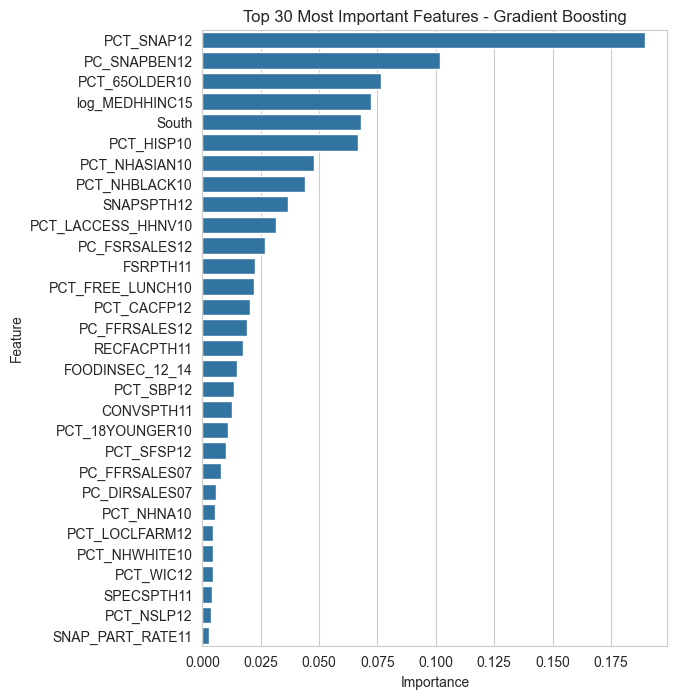

In [148]:
    # Get feature importances
feature_importances_GB = best_estimator_GB.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_GB = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_GB
})

# Sort the DataFrame by importance in descending order
feature_importance_df_GB = feature_importance_df_GB.sort_values(by='Importance', ascending=False)

# Display the table result
print("Top 30 Most Important Features:")
print(feature_importance_df_GB.head(48))

# Plot feature importances
plt.figure(figsize=(6, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_GB.head(30))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Most Important Features - Gradient Boosting')
plt.show()

Top 30 Most Important Features:
                  Feature  Importance
48                  South    0.343114
7              SNAPSPTH12    0.078356
40             PCT_HISP10    0.064933
44          PCT_65OLDER10    0.057118
39          PCT_NHBLACK10    0.052271
16           PC_SNAPBEN12    0.047565
19       PCT_FREE_LUNCH10    0.046445
15             PCT_SNAP12    0.042892
13          PC_FSRSALES12    0.041376
47         log_MEDHHINC15    0.023733
21              PCT_SBP12    0.023679
41          PCT_NHASIAN10    0.021907
22             PCT_SFSP12    0.019063
12          PC_FFRSALES12    0.017600
26        FOODINSEC_12_14    0.012162
37            RECFACPTH11    0.011752
1      PCT_LACCESS_HHNV10    0.011333
18             PCT_NSLP12    0.009131
25            PCT_CACFP12    0.008302
42             PCT_NHNA10    0.007742
10               FSRPTH11    0.007183
11          PC_FFRSALES07    0.006461
45        PCT_18YOUNGER10    0.005889
31          PC_DIRSALES07    0.004235
43             PCT

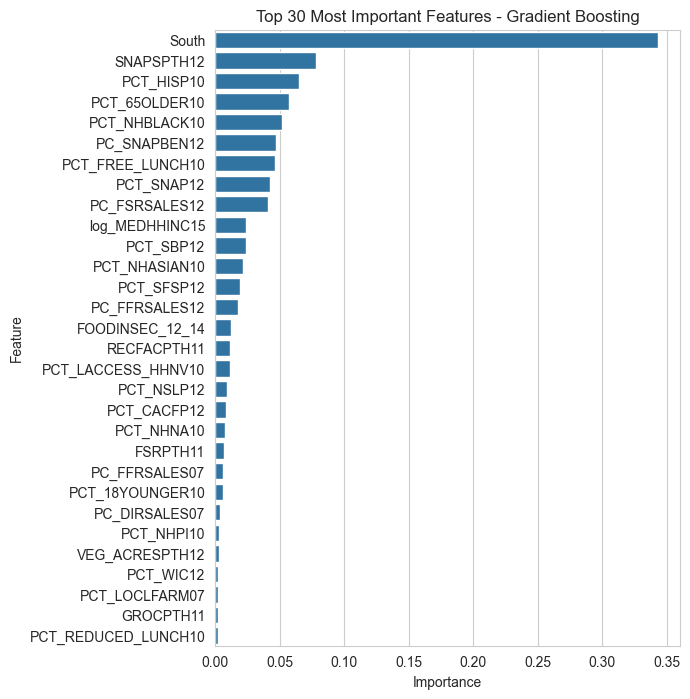

In [153]:
    # Get feature importances
feature_importances_GB08_new = best_estimator_GB08_new.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_GB08_new = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_GB08_new
})

# Sort the DataFrame by importance in descending order
feature_importance_df_GB08_new = feature_importance_df_GB08_new.sort_values(by='Importance', ascending=False)

# Display the table result
print("Top 30 Most Important Features:")
print(feature_importance_df_GB08_new.head(48))

# Plot feature importances
plt.figure(figsize=(6, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_GB08_new.head(30))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Most Important Features - Gradient Boosting')
plt.show()